In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE

In [130]:
df=pd.read_csv('/content/Breast_Cancer.csv')

In [131]:
df.head()

,Age,Race,Marital Status,T-Stage,N-Stage,6th-Stage,differentiate,Grade,A-Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T-Stage                 4024 non-null   object
 4   N-Stage                 4024 non-null   object
 5   6th-Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A-Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [133]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [134]:
print('shape',df.shape)
print('columns',df.columns)
print('Rows',df.shape[0])
print('Columns',df.shape[1])

shape (4024, 16)
columns Index(['Age', 'Race', 'Marital Status', 'T-Stage', 'N-Stage', '6th-Stage',
       'differentiate', 'Grade', 'A-Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
Rows 4024
Columns 16


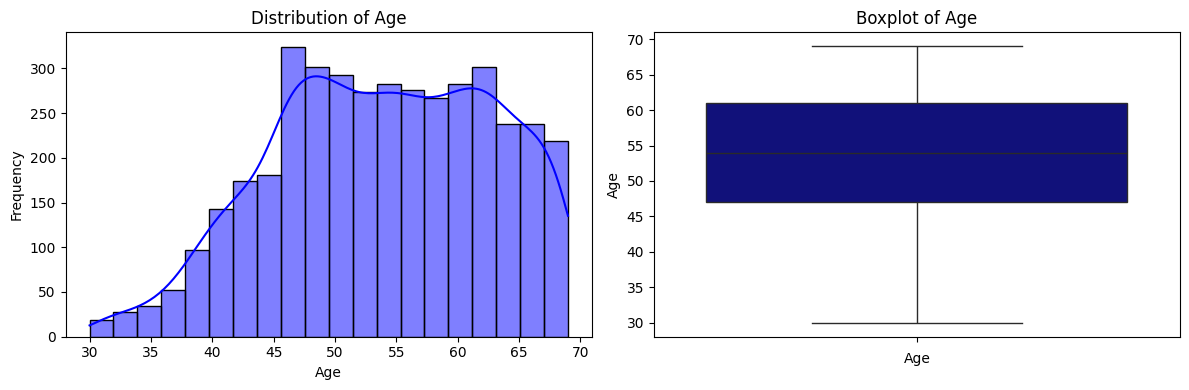

In [135]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True,color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'],color='darkblue')
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


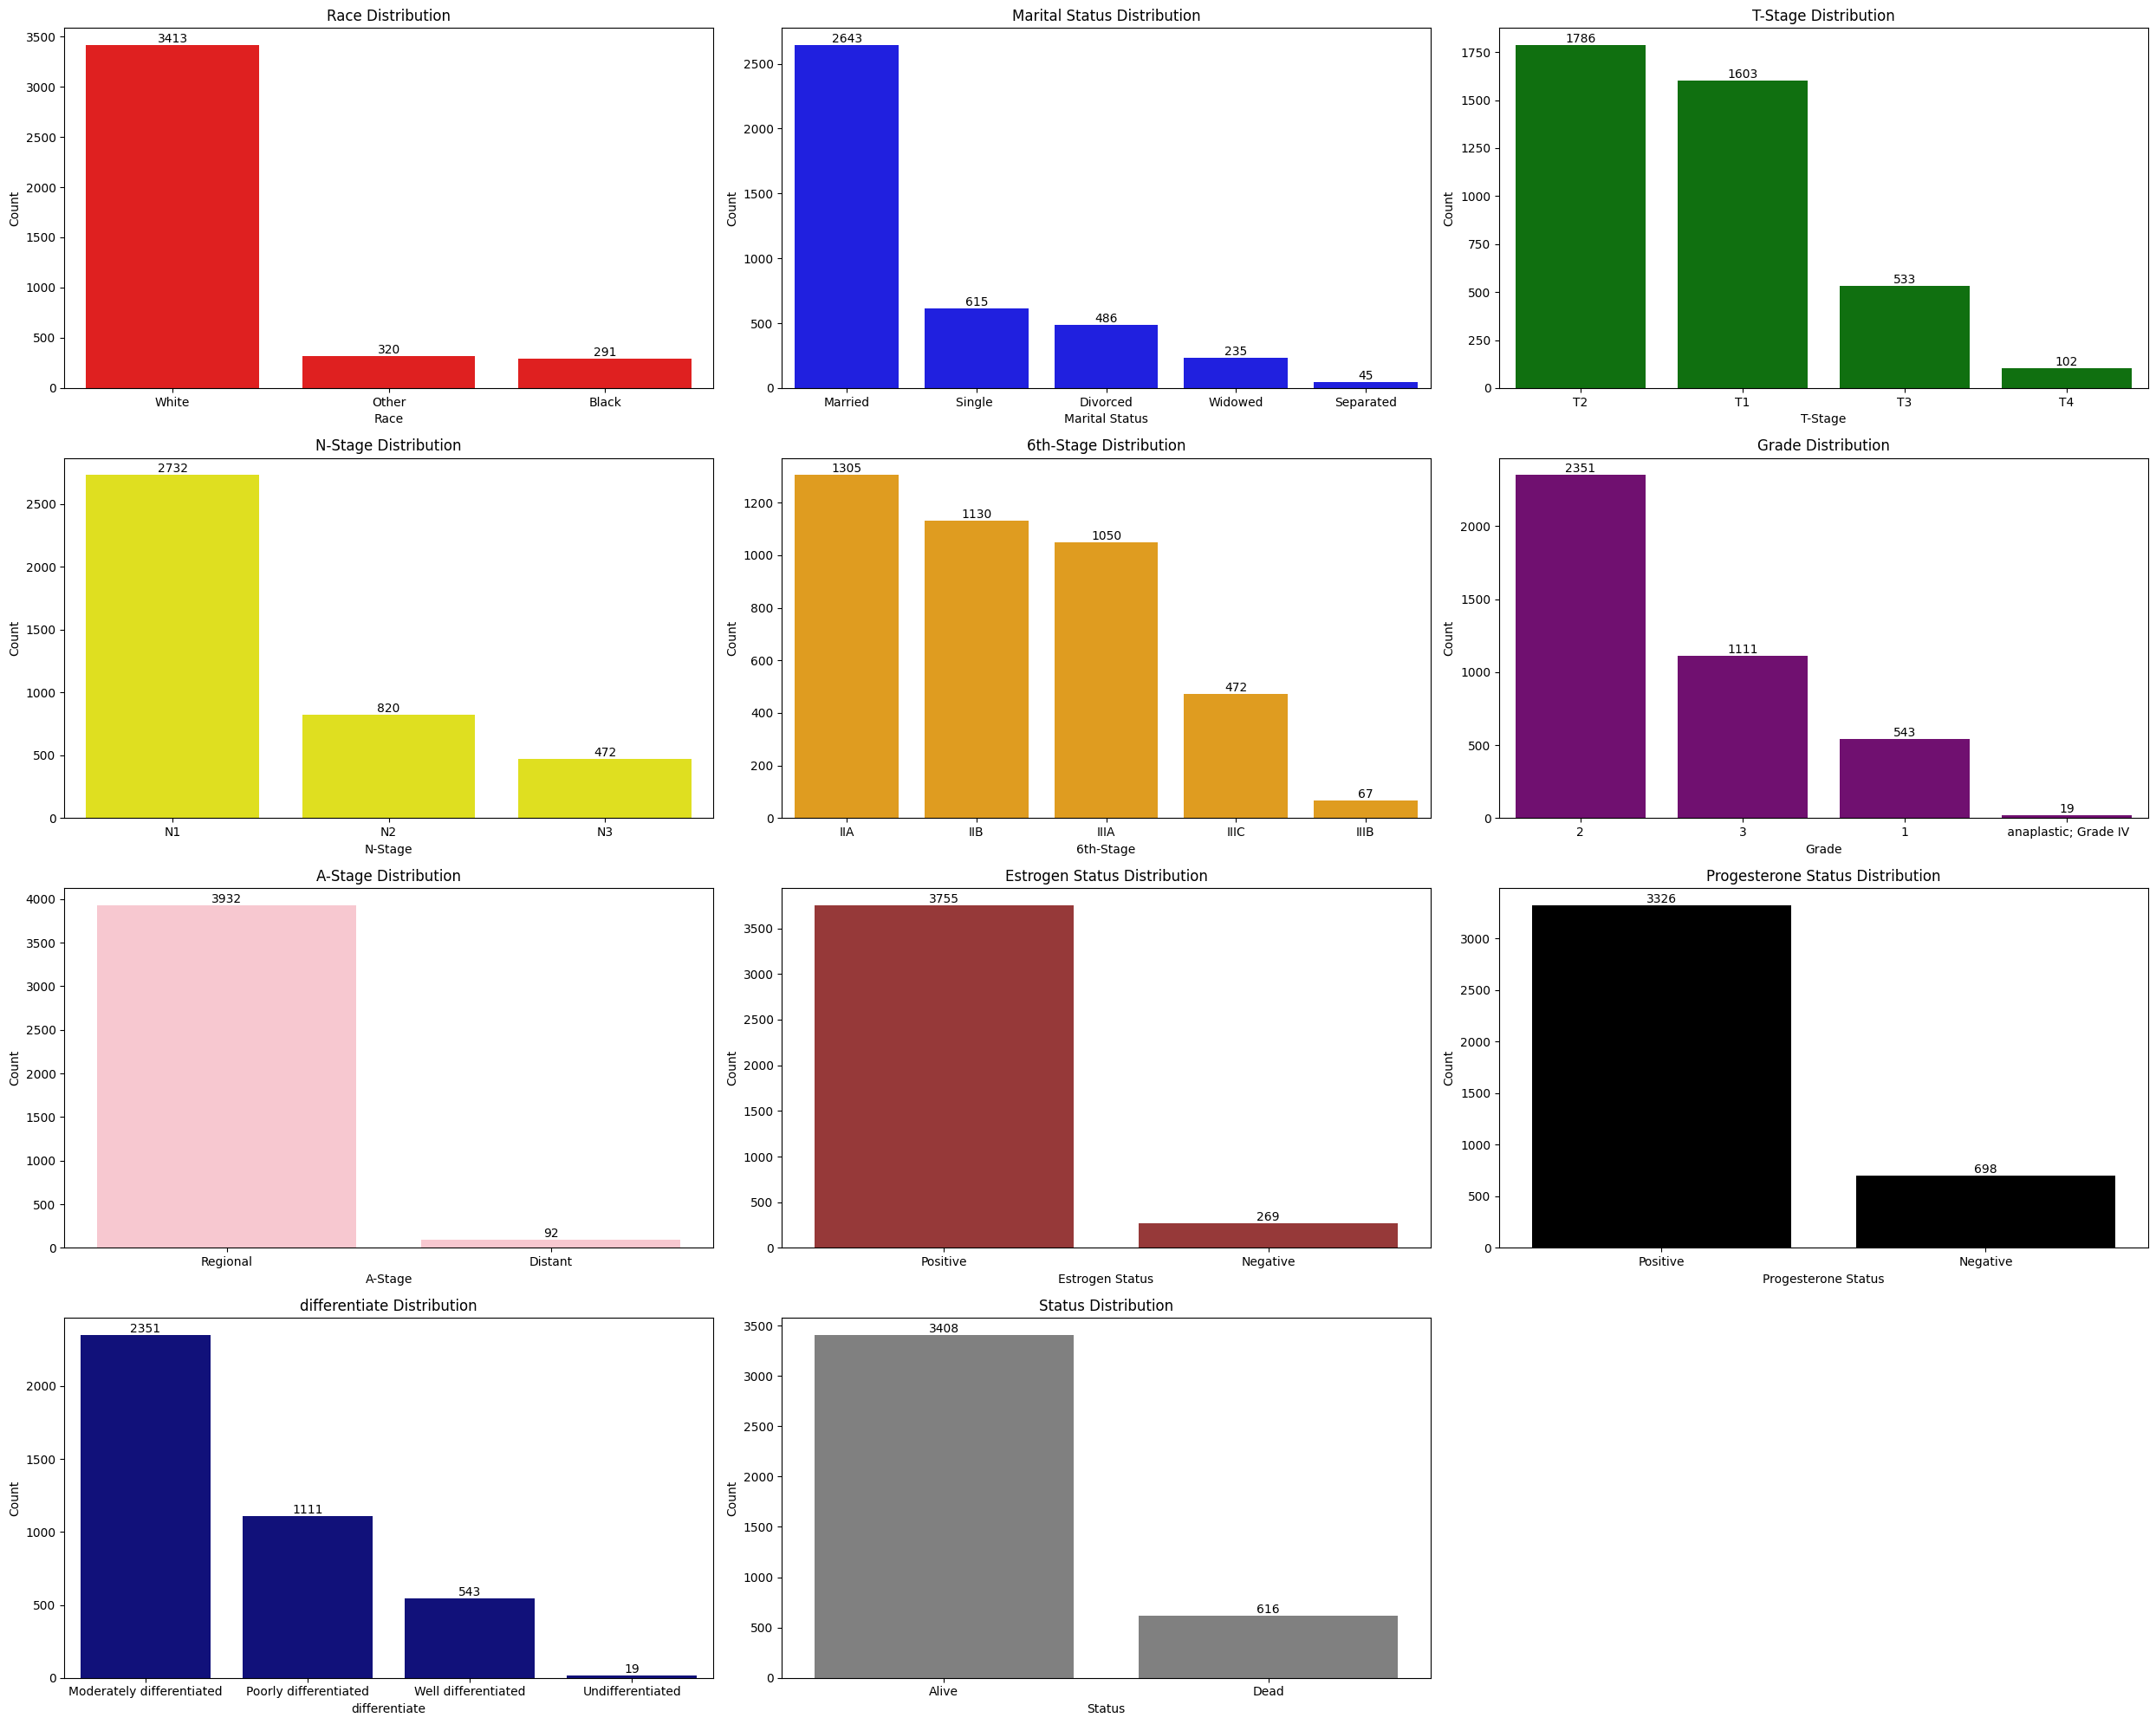

In [137]:
columns_to_plot = [
     'Race', 'Marital Status', 'T-Stage', 'N-Stage', '6th-Stage', 'Grade', 'A-Stage', 'Estrogen Status',
    'Progesterone Status','differentiate', 'Status']


num_columns = len(columns_to_plot)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)
colors = [
    "Red",
    "Blue",
    "Green",
    "Yellow",
    "Orange",
    "Purple",
    "Pink",
    "Brown",
    "Black",
    "darkblue",
    "Gray"
]

plt.figure(figsize=(25, 5 * num_rows))

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, 3, i + 1)
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, color=colors[i])


    for j, count in enumerate(counts.values):
        plt.text(j, count + 0.1, str(count), ha='center', va='bottom')

    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [138]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T-Stage,0
N-Stage,0
6th-Stage,0
differentiate,0
Grade,0
A-Stage,0
Tumor Size,0


In [139]:
df.duplicated().sum()

1

In [140]:
df['T-Stage'].value_counts()

,count
T-Stage,
T2,1786
T1,1603
T3,533
T4,102


In [141]:
print(df['differentiate'].unique())
print(df['Grade'].unique())


['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['3' '2' '1' ' anaplastic; Grade IV']


In [142]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T-Stage', 'N-Stage', '6th-Stage',
       'differentiate', 'Grade', 'A-Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [145]:
df['Status'] = df['Status'].replace(['Alive','Dead', ], [1, 0])
df['T-Stage'] = df['T-Stage'].replace(['T1','T2','T3','T4' ], [1,2,3,4])
df['N-Stage'] = df['N-Stage'].replace(['N0', 'N1', 'N2', 'N3'], [0, 1, 2, 3])
df['6th-Stage'] = df['6th-Stage'].replace(['IA', 'IB', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC', 'IVA', 'IVB'], [1, 2, 3, 4, 5, 6, 7, 8, 9])
df['Estrogen Status'] = df['Estrogen Status'].replace(['Positive', 'Negative'], [1, 0])
df['Progesterone Status'] = df['Progesterone Status'].replace(['Positive', 'Negative'], [1, 0])
df['differentiate'] = df['differentiate'].replace(['Poorly differentiated', 'Moderately differentiated', 'Well differentiated','Undifferentiated'], [1, 2, 3,4])
df['Grade'] = df['Grade'].str.strip()
df['Grade'] = df['Grade'].replace(['Grade 1', 'Grade 2', 'Grade 3', 'anaplastic; Grade IV'], [1, 2, 3, 5])




In [146]:
df['Grade'].isnull().sum()


0

In [147]:
df1 = df.copy()

In [148]:
df1.tail(20)

,Age,Race,Marital Status,T-Stage,N-Stage,6th-Stage,differentiate,Grade,A-Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4004,58,White,Married,2,2,5,2,2,Regional,24,1,0,19,9,65,0
4005,68,White,Married,2,1,4,2,2,Regional,40,1,0,14,2,76,1
4006,41,Other,Married,2,1,4,1,3,Regional,35,0,0,18,2,66,1
4007,44,White,Single,4,1,6,2,2,Regional,21,1,1,10,1,75,1
4008,60,White,Single,1,1,3,3,1,Regional,18,1,1,19,2,52,1
4009,53,White,Divorced,3,1,5,2,2,Regional,100,1,0,20,1,107,1
4010,59,Black,Single,2,1,4,1,3,Regional,23,1,0,6,1,27,0
4011,62,White,Widowed,2,2,5,2,2,Regional,25,1,1,24,4,100,1
4012,51,White,Married,3,3,7,1,3,Regional,80,1,1,20,12,79,1
4013,68,White,Married,1,1,3,3,1,Regional,15,0,0,10,1,102,1


In [149]:
df1.shape


(4024, 16)

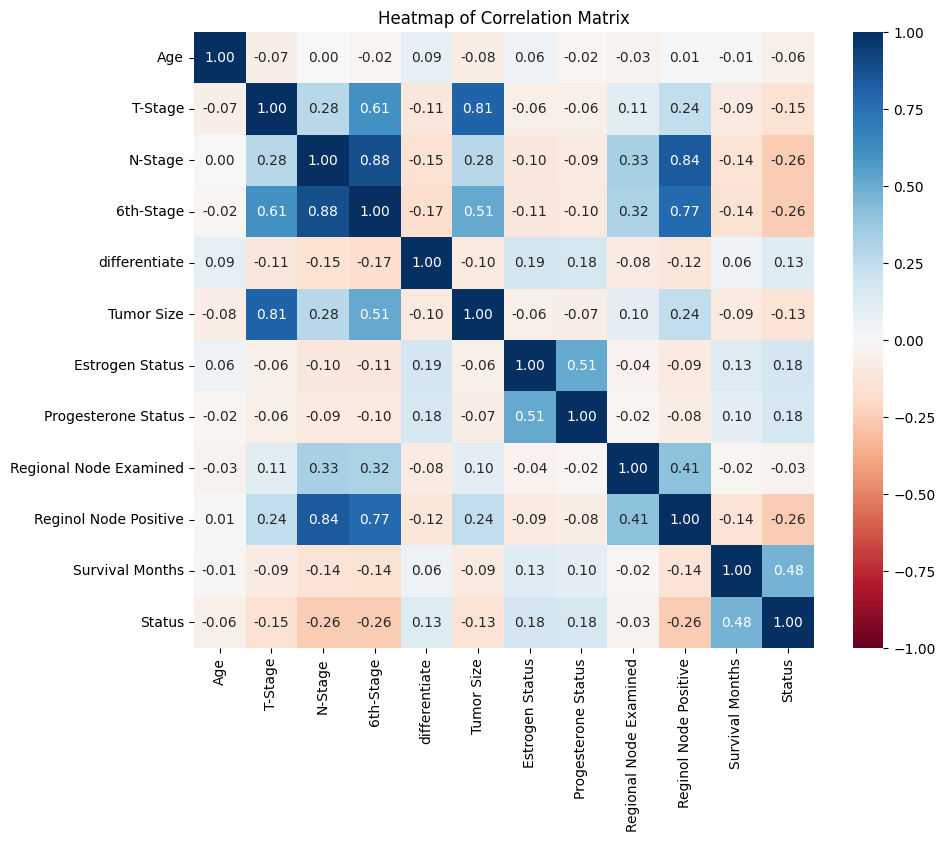

In [150]:
numerical_columns = df1.select_dtypes(include=['number'])
corr = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [151]:
x = df1.drop(['Status'], axis=1)
y = df1['Status']

In [152]:
x.head()

,Age,Race,Marital Status,T-Stage,N-Stage,6th-Stage,differentiate,Grade,A-Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,White,Married,1,1,3,1,3,Regional,4,1,1,24,1,60
1,50,White,Married,2,2,5,2,2,Regional,35,1,1,14,5,62
2,58,White,Divorced,3,3,7,2,2,Regional,63,1,1,14,7,75
3,58,White,Married,1,1,3,1,3,Regional,18,1,1,2,1,84
4,47,White,Married,2,1,4,1,3,Regional,41,1,1,3,1,50


In [153]:
df['Grade'].value_counts()

,count
Grade,
2,2351
3,1111
1,543
5,19


In [154]:
x.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T-Stage                 4024 non-null   int64 
 4   N-Stage                 4024 non-null   int64 
 5   6th-Stage               4024 non-null   int64 
 6   differentiate           4024 non-null   int64 
 7   Grade                   4024 non-null   object
 8   A-Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   int64 
 11  Progesterone Status     4024 non-null   int64 
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
dtypes: i

In [155]:
y.head(20)

,Status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [156]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T-Stage', 'N-Stage', '6th-Stage',
       'differentiate', 'Grade', 'A-Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [157]:
df1=df.drop(['Age', 'Race', 'Marital Status','A-Stage','Regional Node Examined'],axis=1)

In [158]:
x=df1.drop(['Status'],axis=1)
y=df1['Status']

In [159]:
x.head()

,T-Stage,N-Stage,6th-Stage,differentiate,Grade,Tumor Size,Estrogen Status,Progesterone Status,Reginol Node Positive,Survival Months
0,1,1,3,1,3,4,1,1,1,60
1,2,2,5,2,2,35,1,1,5,62
2,3,3,7,2,2,63,1,1,7,75
3,1,1,3,1,3,18,1,1,1,84
4,2,1,4,1,3,41,1,1,1,50


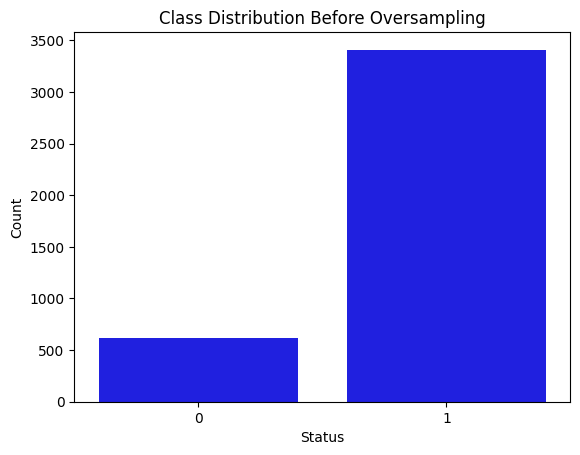

In [160]:
counts = y.value_counts()
sns.barplot(x=counts.index, y=counts.values, color='blue')
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


In [161]:
smote = SMOTE(random_state=42)
x_oversample, y_oversample = smote.fit_resample(x, y)
df_ox = pd.DataFrame(x_oversample, columns=x.columns)
df_oy = pd.Series(y_oversample)

In [162]:
df_oy.value_counts()

,count
Status,
1,3408
0,3408


In [163]:
df_oy.head(10)

,Status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,1


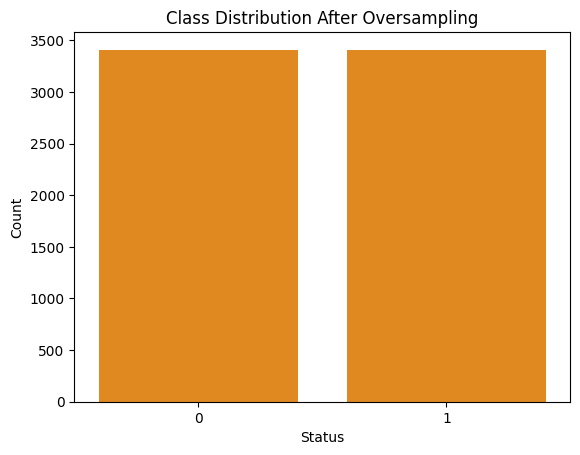

In [164]:
counts = df_oy.value_counts()
sns.barplot(x=counts.index, y=counts.values, color='darkorange')
plt.title('Class Distribution After Oversampling')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Training


In [165]:
X_train, X_test, y_train, y_test = train_test_split(df_ox, df_oy, test_size=0.20, random_state=42)

In [166]:
X_train.shape


(5452, 10)

In [167]:
y_train.shape

(5452,)

In [168]:
X_test.shape

(1364, 10)

In [169]:
y_test.shape

(1364,)

In [171]:
dict_models = {
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel="linear")
}

In [172]:
dict_models

{'Logistic Regression': LogisticRegression(),
 'K-NN': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(random_state=10),
 'Random Forest': RandomForestClassifier(random_state=42),
 'SVM': SVC(kernel='linear')}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Test Accuracy = 78.96%
Logistic Regression: Train Accuracy = 80.69%
Classification Report for Logistic Regression on Train Data:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2723
           1       0.79      0.83      0.81      2729

    accuracy                           0.81      5452
   macro avg       0.81      0.81      0.81      5452
weighted avg       0.81      0.81      0.81      5452

--------------------------------------------------
K-NN: Test Accuracy = 84.97%
K-NN: Train Accuracy = 90.96%
Classification Report for K-NN on Train Data:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2723
           1       0.94      0.88      0.91      2729

    accuracy                           0.91      5452
   macro avg       0.91      0.91      0.91      5452
weighted avg       0.91      0.91      0.91      5452

----------------------------------------

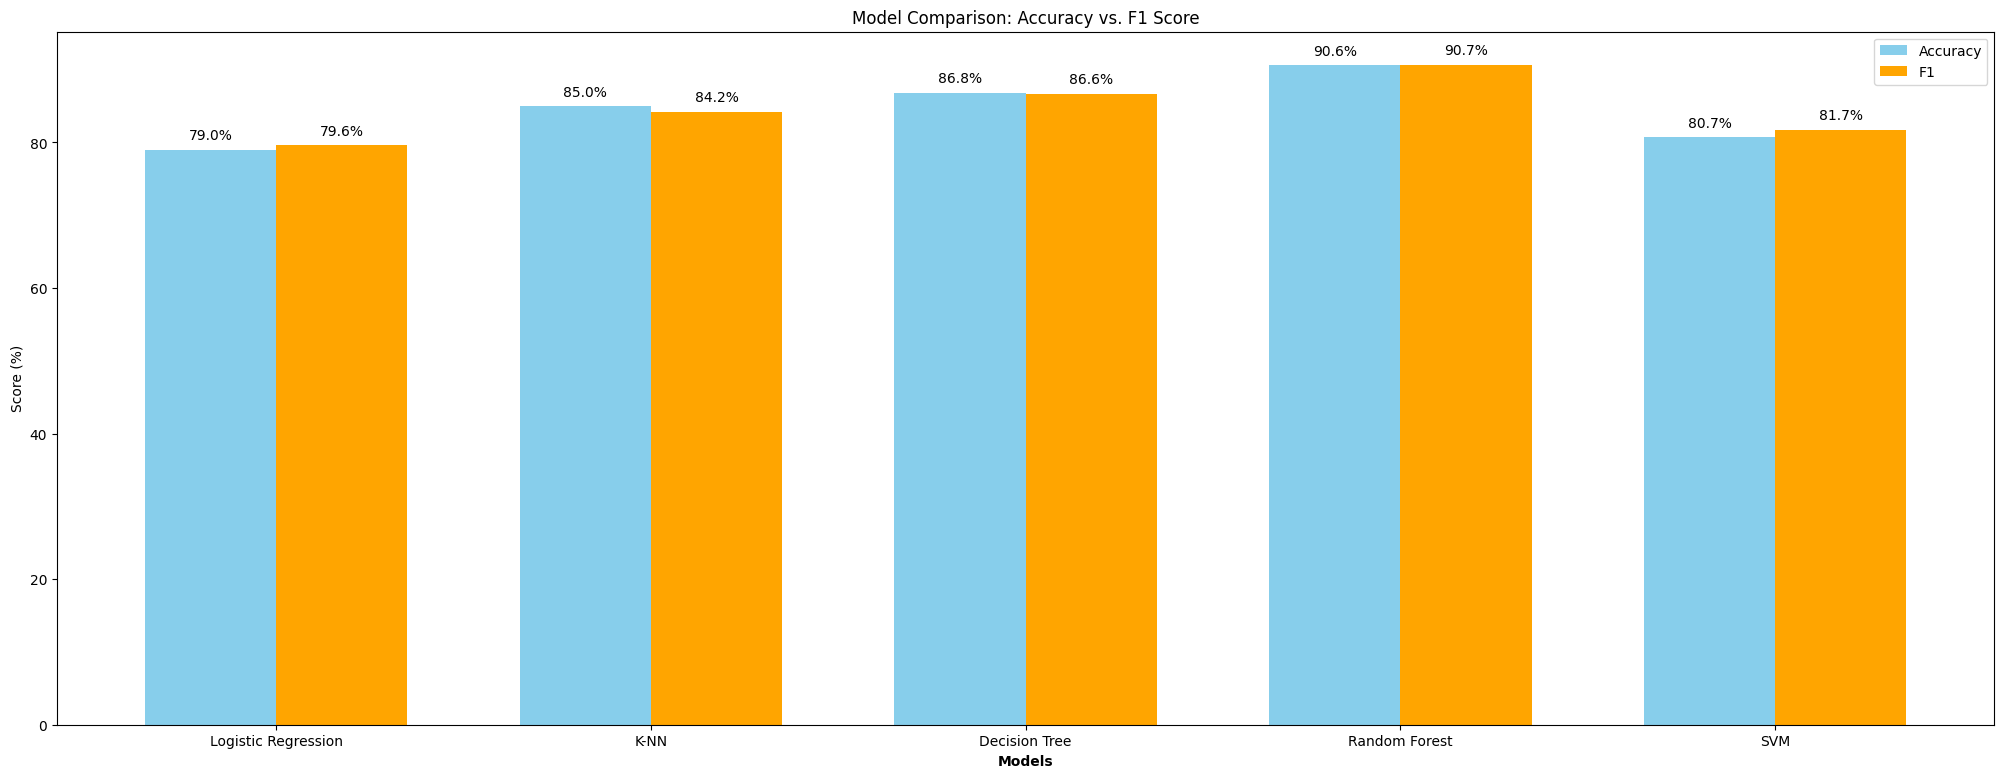

Mean Squared Error: 0.19281524926686217
Mean Absolute Error: 0.19281524926686217


In [173]:
list_models_accuracy = []
list_models_f1 = []
list_models_name = []

for name, model in dict_models.items():
    list_models_name.append(name)

    # تدريب النموذج
    model.fit(X_train, y_train)

    # التنبؤ على بيانات الاختبار
    predict_test = model.predict(X_test)

    # حساب الدقة وF1 Score
    acc = accuracy_score(y_test, predict_test)
    f1 = f1_score(y_test, predict_test)

    list_models_accuracy.append(acc * 100)
    list_models_f1.append(f1 * 100)

    # التنبؤ على بيانات التدريب
    predict_train = model.predict(X_train)

    # عرض النتائج
    print(f"{name}: Test Accuracy = {acc * 100:.2f}%")
    print(f"{name}: Train Accuracy = {accuracy_score(y_train, predict_train) * 100:.2f}%")
    print(f"Classification Report for {name} on Train Data:")
    print(classification_report(y_train, predict_train))
    print("-" * 50)

# عرض نتائج النماذج في رسم بياني
df_models_accuracy = pd.DataFrame({
    'model_name': list_models_name,
    'accuracy': list_models_accuracy,
    'F1': list_models_f1
})

plt.figure(figsize=(25, 9))
bar_width = 0.35
r1 = range(len(df_models_accuracy['model_name']))
r2 = [x + bar_width for x in r1]

bars1 = plt.bar(r1, df_models_accuracy['accuracy'], color='skyblue', width=bar_width, label='Accuracy')
bars2 = plt.bar(r2, df_models_accuracy['F1'], color='orange', width=bar_width, label='F1')

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df_models_accuracy['model_name']))], df_models_accuracy['model_name'])
plt.ylabel('Score (%)')
plt.title('Model Comparison: Accuracy vs. F1 Score')
plt.legend()
plt.show()

# عرض الخطأ المربع المتوسط وخطأ القيمة المطلقة
print('Mean Squared Error:', mean_squared_error(y_true=y_test, y_pred=predict_test))
print('Mean Absolute Error:', mean_squared_error(y_true=y_test, y_pred=predict_test))

In [174]:
model = dict_models['Random Forest']
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [197]:
# تحديث أسماء الأعمدة في بيانات التدريب
df1.columns = df1.columns.str.strip()


In [198]:
def transform_data(df):
    df['T-Stage'] = df['T-Stage'].astype(str).replace(['T1', 'T2', 'T3', 'T4'], [1, 2, 3, 4])
    df['N-Stage'] = df['N-Stage'].astype(str).replace(['N0', 'N1', 'N2', 'N3'], [0, 1, 2, 3])
    df['6th-Stage'] = df['6th-Stage'].astype(str).replace(['IA', 'IB', 'IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC', 'IVA', 'IVB'], [1, 2, 3, 4, 5, 6, 7, 8, 9])
    df['Estrogen Status'] = df['Estrogen Status'].astype(str).replace(['Positive', 'Negative'], [1, 0])
    df['Progesterone Status'] = df['Progesterone Status'].astype(str).replace(['Positive', 'Negative'], [1, 0])
    df['differentiate'] = df['differentiate'].astype(str).replace(['Poorly differentiated', 'Moderately differentiated', 'Well differentiated', 'Undifferentiated'], [1, 2, 3, 4])
    df['Grade'] = df['Grade'].astype(str).str.strip().replace(['Grade 1', 'Grade 2', 'Grade 3', 'anaplastic; Grade IV'], [1, 2, 3, 5])
    return df

In [199]:
patient_data_alive = {
    'T-Stage': 'T1',
    'N-Stage': 'N0',
    '6th-Stage': 'IA',
    'Estrogen Status': 'Positive',
    'Progesterone Status': 'Positive',
    'differentiate': 'Well differentiated',
    'Grade': 'Grade 1',
    'Tumor Size': 10,
    'Reginol Node Positive': 1,
    'Survival Months': 24
}

In [196]:
patient_data_dead = {
    'T-Stage': 'T4',
    'N-Stage': 'N3',
    '6th-Stage': 'IVB',
    'Estrogen Status': 'Negative',
    'Progesterone Status': 'Negative',
    'differentiate': 'Poorly differentiated',
    'Grade': 'anaplastic; Grade IV',
    'Tumor Size': 50,
    'Reginol Node Positive': 10,
    'Survival Months': 6
}

In [205]:
patient_data_dead = {
    'T-Stage': 'T3',
    'N-Stage': 'N1',
    '6th-Stage': 'IVB',
    'Estrogen Status': 'Negative',
    'Progesterone Status': 'Negative',
    'differentiate': 'Poorly differentiated',
    'Grade': 'anaplastic; Grade IV',
    'Tumor Size': 80,
    'Reginol Node Positive': 20,
    'Survival Months': 14
}

In [207]:
patient_data_alive = {
    'T-Stage': 'T1',  # مرحلة مبكرة من الورم
    'N-Stage': 'N0',  # عدم وجود انتشار إلى العقد الليمفاوية
    '6th-Stage': 'IA',  # مرحلة مبكرة جدًا
    'Estrogen Status': 'Positive',  # وجود مستقبلات هرمونية إيجابية
    'Progesterone Status': 'Positive',  # وجود مستقبلات هرمونية إيجابية
    'differentiate': 'Well differentiated',  # ورم متمايز جيدًا (نمو بطيء)
    'Grade': 'Grade 1',  # درجة منخفضة
    'Tumor Size': 20,  # حجم ورم صغير
    'Reginol Node Positive': 0,  # عدم وجود انتشار إلى العقد الليمفاوية
    'Survival Months': 60  # فترة بقاء طويلة
}

In [208]:
input_df = pd.DataFrame([patient_data_alive])
input_df = transform_data(input_df)
input_df = input_df[x.columns]


input_data = np.array(input_df)
predicted = model.predict(input_data)
print(f"Cancer Prediction: {predicted}")

Cancer Prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
